In [4]:
# Import necessary libraries
import os
import numpy as np
import cv2
from tensorflow.keras.preprocessing.image import img_to_array
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

# Load and preprocess the data
DATA_DIR = './dataset'
IMAGE_SIZE = 128
CATEGORIES = ['potholes', 'normal']

def load_data(data_dir):
    data = []
    labels = []

    for category in CATEGORIES:
        path = os.path.join(data_dir, category)
        class_num = CATEGORIES.index(category)

        for img in os.listdir(path):
            try:
                img_path = os.path.join(path, img)
                image = cv2.imread(img_path)
                image = cv2.resize(image, (IMAGE_SIZE, IMAGE_SIZE))
                image = img_to_array(image)
                data.append(image)
                labels.append(class_num)
            except Exception as e:
                print(e)

    return np.array(data), np.array(labels)

X, y = load_data(DATA_DIR)
X = X / 255.0

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build and Train the Model
y_train = to_categorical(y_train, num_classes=len(CATEGORIES))
y_test = to_categorical(y_test, num_classes=len(CATEGORIES))

base_model = MobileNet(input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3), include_top=False, weights='imagenet')

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(len(CATEGORIES), activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32)

# Evaluation
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Save the model
model.save('pothole_detector_model.h5')


OpenCV(4.8.1) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4062: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'



Epoch 1/10
15/15 [==============================] - 6s 292ms/step - loss: 0.2964 - accuracy: 0.9149 - val_loss: 0.3109 - val_accuracy: 0.9322
Epoch 2/10
15/15 [==============================] - 4s 264ms/step - loss: 0.1046 - accuracy: 0.9787 - val_loss: 0.1391 - val_accuracy: 0.9746
Epoch 3/10
15/15 [==============================] - 4s 260ms/step - loss: 0.0202 - accuracy: 0.9957 - val_loss: 0.0377 - val_accuracy: 0.9831
Epoch 4/10
15/15 [==============================] - 4s 260ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.0688 - val_accuracy: 0.9831
Epoch 5/10
15/15 [==============================] - 3s 233ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.0619 - val_accuracy: 0.9831
Epoch 6/10
15/15 [==============================] - 3s 236ms/step - loss: 2.0654e-04 - accuracy: 1.0000 - val_loss: 0.0524 - val_accuracy: 0.9915
Epoch 7/10
15/15 [==============================] - 4s 238ms/step - loss: 2.0205e-04 - accuracy: 1.0000 - val_loss: 0.0542 - val_accuracy: 0.991

C:\Users\Isiwara.Uditha\AppData\Local\anaconda3\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [5]:
predictions = model.predict(X_test)

4/4 [==============================] - 1s 167ms/step


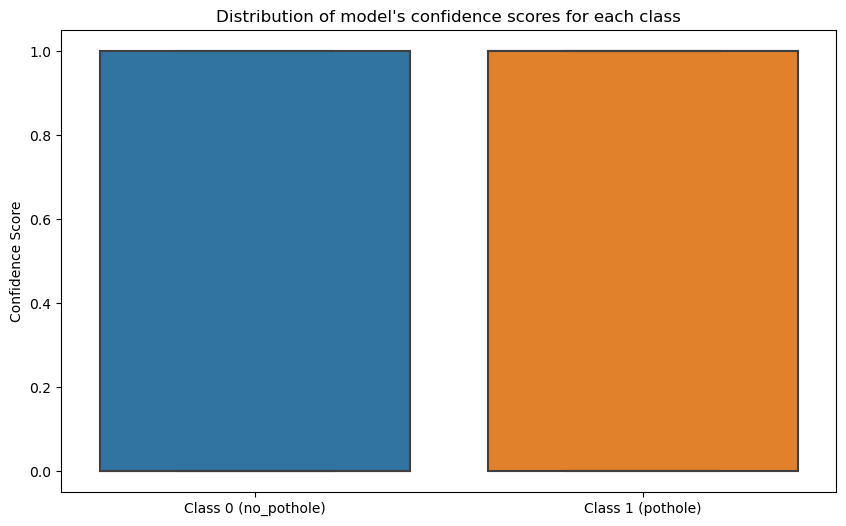

In [6]:
# generate a boX plot
import seaborn as sns
import matplotlib.pyplot as plt

class_0_scores = predictions[:, 0]
class_1_scores = predictions[:, 1]

plt.figure(figsize=(10, 6))
sns.boxplot(data=[class_0_scores, class_1_scores])
plt.xticks([0, 1], ['Class 0 (no_pothole)', 'Class 1 (pothole)'])
plt.title("Distribution of model's confidence scores for each class")
plt.ylabel('Confidence Score')
plt.show()


In [7]:
# predict the classes for the test data
y_pred = np.argmax(model.predict(X_test), axis=1)
y_true = np.argmax(y_test, axis=1)

4/4 [==============================] - 1s 165ms/step


In [9]:
# Generate the confusion matrix
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_true, y_pred)

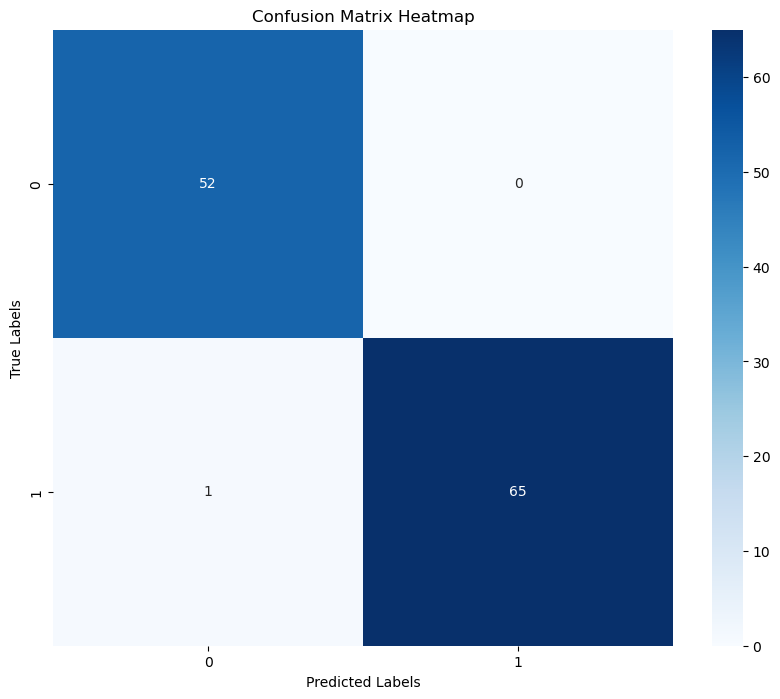

In [10]:
#Plot the heatmap using Seaborn
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()
